In [80]:
import pandas as pd

df_icecream = pd.read_csv('icecream.csv', delimiter=',', header='infer')
df_icecream

,Temperature,Price
0,14.2,215
1,16.4,295
2,11.9,154
3,15.2,376
4,18.5,423
5,22.1,522
6,19.4,450
7,25.1,614
8,23.4,524
9,18.1,450


In [81]:
df_icecream = df_icecream.sort_values('Temperature', ascending=True)
df_icecream

,Temperature,Price
2,11.9,154
0,14.2,215
3,15.2,376
1,16.4,295
11,17.2,390
9,18.1,450
4,18.5,423
6,19.4,450
5,22.1,522
10,22.6,445


In [82]:
for col_name in ['Price','Temperature']:
    col = df_icecream[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Price:
 - Range: 566.00
 - Variance: 23232.77
 - Std.Dev: 152.42

Temperature:
 - Range: 18.80
 - Variance: 29.09
 - Std.Dev: 5.39


In [83]:
print(f'O preço está variando 68% dentro de {round(df_icecream.Price.mean()-df_icecream.Price.std(), 2)} e {round(df_icecream.Price.mean()+df_icecream.Price.std(), 2)}')

O preço está variando 68% dentro de 315.35 e 620.2


In [84]:
# Mostra que os dados estão correlacionados indo de -1 a 1 
df_normalized = df_icecream[['Temperature','Price']].copy()
df_normalized.Temperature.corr(df_normalized.Price)

0.9430703780273102

<Axes: title={'center': 'Icecream sales'}, xlabel='Temperature', ylabel='Price'>

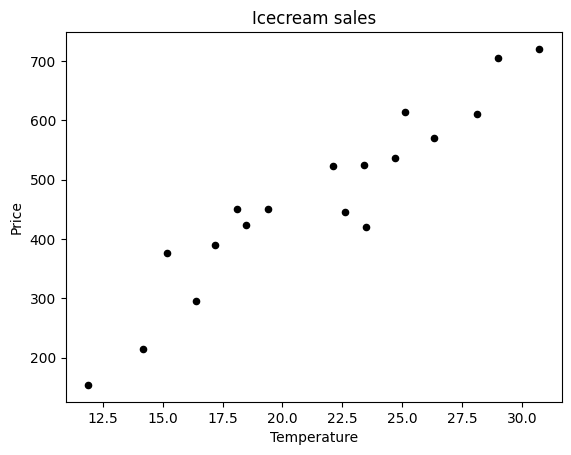

In [85]:
df_icecream.plot.scatter(title='Icecream sales', x='Temperature', y='Price',color='black')

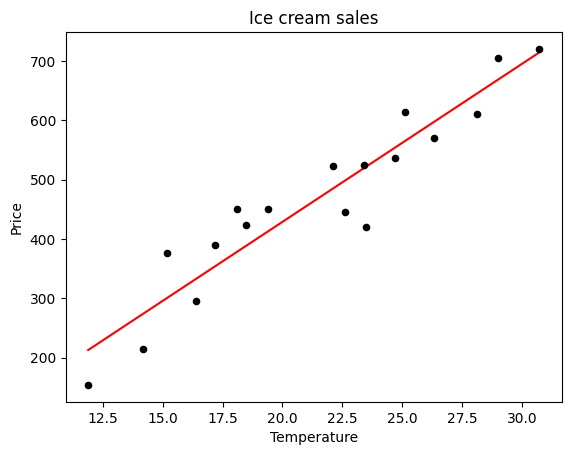

Coeficiente angular da reta: 26.65345359921261
Valor de y onde a reta intecepta o eixo y: -104.38302615198626


In [86]:
from matplotlib import pyplot as plt
from scipy import stats

df_regression = df_icecream[['Price','Temperature']].copy()

m, b, r, p, e = stats.linregress(df_regression['Temperature'], df_regression['Price'])

df_regression['fx'] = (m*df_regression['Temperature']) + b

df_regression['error'] = df_regression['fx'] - df_regression['Temperature']

df_regression.plot.scatter(title='Ice cream sales', x='Temperature', y='Price', color='black', zorder=2)

plt.plot(df_regression['Temperature'], df_regression['fx'], color='red', zorder=1)

plt.show()

print(f"Coeficiente angular da reta: {m}\nValor de y onde a reta intecepta o eixo y: {b}")

In [87]:
def predict(x):
    return m*x+b

prediction = predict(32)

prediction

748.5274890228172